In [2]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import tensorflow as tf # Tensor flow is a key package for performing automatic differntiation (the gradient descent we use for optimisation)
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the imbuilt sclaing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files
import scipy
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful
from sklearn.ensemble import RandomForestRegressor # getting the random forest model 

# Below are a wide selection of tensorflow libraries we will need to construct our Neural networks.
from tensorflow.keras.activations import sigmoid, linear, relu # Activation functions we will use
from tensorflow.keras.models import Model, Sequential # Different mays of constructing models, we will primarily be covering the 'functional api' which uses `Model`
from tensorflow.keras.optimizers import SGD, Adam# We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping # Allows Early Stopping regularisation method.



from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import sklearn.svm 

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [3]:
uploaded = files.upload() 
#customerData = pd.read_csv("D:/raheel/Data Science/GRE Data Science/Machine Learning/Comp1801CourseworkData.csv")


Saving Comp1801CourseworkData.csv to Comp1801CourseworkData.csv


**Part 3 – Regression (Linear Regression)**

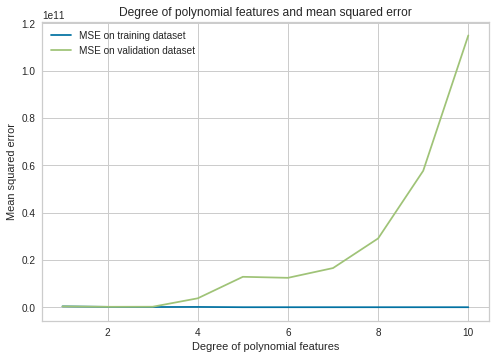

The best degree of polynomials: 2


In [6]:
# reading the csv file
raw_df = pd.read_csv('Comp1801CourseworkData.csv')
# displaying the top 5 rows
raw_df.head()
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

# using label encoding for categorical data
lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

# displaying the top 5 rows after preprocessing
df.head()

#setting the target variables
tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

# prepare NumPy ndarrays
X_raw = np.array(df[col])
y = np.array(df[tar])

# splitting data into train and test data sets in 60:20:20 split
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)

#setting the target variables
tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

# prepare NumPy ndarrays
X_raw = np.array(df[col])
y = np.array(df[tar])

# splitting data into train and test data sets in 60:20:20 split
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)

max_degree = 10 #Define the max degree to test
# Initialise the MSE arrays, filling them with NaN's
mse_train_array = np.full([max_degree + 1], np.nan)
mse_valid_array = np.full([max_degree + 1], np.nan)
degrees = range(1, max_degree+1) # create list of degree values being iterated through

for degree in degrees:
  
  # Initialise
  model = sklearn.linear_model.LinearRegression()
  poly = PolynomialFeatures(degree=degree)
  scaler = StandardScaler()
  # Train
  poly.fit(X_train_raw)
  X_train_poly = poly.transform(X_train_raw)
  scaler.fit(X_train_poly)
  X_train = scaler.transform(X_train_poly)  
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validate
  X_valid_poly = poly.transform(X_valid_raw)
  X_valid = scaler.transform(X_valid_poly)  
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_valid, y_pred_valid)

  # Store MSE for this degree value
  mse_train_array[degree] = mse_train
  mse_valid_array[degree] = mse_valid


plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_valid_array[1:], label='MSE on validation dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_valid_array) # Finds the smallest VALIDATION MSE in the array (ignoring any NaN values).
print('The best degree of polynomials:', best_degree)

Implementing linear regression with ploynomial feature of degree 2 that we got from the above implementation




MSE on training data: 145472680.09557775
MSE on validation data: 171248860.6741924
Mean squared error loss: 142684141.3982
R2 score: 0.7272


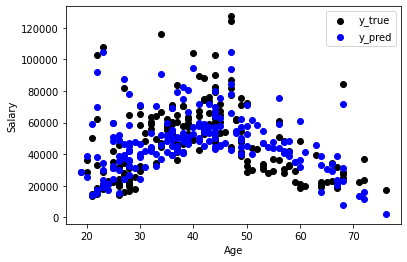

In [4]:
customerData = pd.read_csv('Comp1801CourseworkData.csv')
raw_df = pd.DataFrame(data = customerData)
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

#display(df)

tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_raw = np.array(df[col_fin])
y = np.array(df[tar])


X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)


#Using Polynomial freature 
degree = 2
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train_raw) # Fit the poly object to the training data to make a new feature matrix

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_poly_stded, y_train)

y_pred_train = reg.predict(X_train_poly_stded) # Use our fitted linear regression model to make a prediction
mse_train = mean_squared_error(y_train, y_pred_train) # Calculate the Mean Squared Error for our training data predictions
print('MSE on training data:', mse_train)

#validation
X_valid_poly = poly.transform(X_valid_raw) # Add polynomial features to the validation data
X_valid = scaler.transform(X_valid_poly)

y_pred_valid = reg.predict(X_valid) # Use our fitted linear regression model to make a prediction based on teh validation dataset
mse_valid = mean_squared_error(y_valid, y_pred_valid)  # Calculate the Mean Squared Error for our validation data predictions
print('MSE on validation data:', mse_valid)


#Testing
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)

y_pred_test = reg.predict(X_test)


print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred_test)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

X_new_disp =X_test_raw[:,0] # for plotting purpose
plt.scatter(X_new_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Part 3 - Random Forest**

MSE on training data: 9835629.985750565
MSE on validation data: 92239509.41753529
Mean squared error loss: 78032950.4912
R2 score: 0.8508


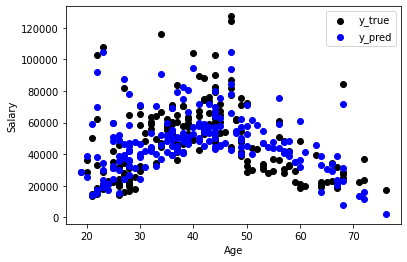

In [10]:
customerData = pd.read_csv('Comp1801CourseworkData.csv')
raw_df = pd.DataFrame(data = customerData)
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

#display(df)

tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_raw = np.array(df[col_fin])
y = np.array(df[tar])


X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)


#Using Polynomial freature 
degree = 2
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train_raw) # Fit the poly object to the training data to make a new feature matrix

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)

# create regressor object
regressor = RandomForestRegressor(n_estimators = 200)
 
# fit the regressor with x and y data
regressor.fit(X_train_poly_stded,y_train) 

#MSE for trainig data
y_pred_train = regressor.predict(X_train_poly_stded)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE on training data:', mse_train)

#MSE for Validation data
X_valid_poly = poly.transform(X_valid_raw) # Add polynomial features to the validation data
X_valid = scaler.transform(X_valid_poly)

y_pred_valid = regressor.predict(X_valid) # Use our fitted linear regression model to make a prediction based on teh validation dataset
mse_valid = mean_squared_error(y_valid, y_pred_valid)  # Calculate the Mean Squared Error for our validation data predictions
print('MSE on validation data:', mse_valid)

X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)
Y_pred = regressor.predict(X_test)

print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test,Y_pred)))
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, Y_pred)))

X_new_disp =X_test_raw[:,0] # for plotting purpose
plt.scatter(X_new_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Part 3 Ridge regression**

In [8]:
#Ridge regression
customerData = pd.read_csv('Comp1801CourseworkData.csv')
raw_df = pd.DataFrame(data = customerData)
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

#display(df)

tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_raw = np.array(df[col_fin])
y = np.array(df[tar])


X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)


#Using Polynomial freature 
degree = 2
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train_raw) # Fit the poly object to the training data to make a new feature matrix

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)

rr = Ridge(alpha=0.01)
rr.fit(X_train_poly_stded, y_train)
y_pred_train = rr.predict(X_train_poly_stded)

#validation
X_valid_poly = poly.transform(X_valid_raw) # Add polynomial features to the validation data
X_valid = scaler.transform(X_valid_poly)
y_pred_valid = rr.predict(X_valid)


#testing
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)
pred_train_rr= rr.predict(X_test)

# The mean squared error loss
print('Mean squared error loss for training data: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train,y_pred_train)))
print('Mean squared error loss for validation data: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_valid,y_pred_valid)))
print('Mean squared error loss for test data: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test,pred_train_rr)))
# # The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, pred_train_rr)))


Mean squared error loss for training data: 145472930.0386
Mean squared error loss for validation data: 171175765.6515
Mean squared error loss for test data: 142725476.2823
R2 score: 0.7271


**Part 3 -Lasso Regression**

In [11]:
# Lasso Regression
customerData = pd.read_csv('Comp1801CourseworkData.csv')
raw_df = pd.DataFrame(data = customerData)
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

#display(df)

tar='Salary'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_raw = np.array(df[col_fin])
y = np.array(df[tar])


X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)


#Using Polynomial freature 
degree = 2
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train_raw) # Fit the poly object to the training data to make a new feature matrix

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)

alphas = alpha_indices = np.arange(20)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_poly_stded, y_train)

y_pred_train = model_lasso.predict(X_train_poly_stded)

#validation
X_valid_poly = poly.transform(X_valid_raw) # Add polynomial features to the validation data
X_valid = scaler.transform(X_valid_poly)
y_pred_valid = model_lasso.predict(X_valid)


#testing
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)

pred_train_lasso= model_lasso.predict(X_test)

# The mean squared error loss
print('Mean squared error loss for training data: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train,y_pred_train)))
print('Mean squared error loss for validation data: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_valid,y_pred_valid)))
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test,pred_train_lasso)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, pred_train_lasso)))


Mean squared error loss for training data: 145472680.1939
Mean squared error loss for validation data: 171247279.3170
Mean squared error loss: 142684570.6271
R2 score: 0.7272


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+10, tolerance: 3.078e+07
  model = cd_fast.enet_coordinate_descent(


**Part 4 -Binary classification using Logistic regression**

data frame after pre-processing


,Age,SiteSpending,SiteTime,RecommendImpression,Sex,Salary,East Midlands,East of England,London,North East,...,Degree,GCSE,Masters,None,Other,PhD,Private sector,Public Sector,Self Employed,Unemployed
0,43,1877.77,50.30,2,0,64891.98,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,265.03,71.00,0,1,57963.67,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24,624.06,87.70,3,0,14969.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,3185.07,194.51,7,0,71403.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,52,141.47,290.55,5,1,26001.26,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,124.65,163.45,9,1,38391.92,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,37,1061.61,97.25,3,0,36076.76,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,38,1859.63,160.02,0,0,58524.18,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,50,40.43,271.73,9,0,39573.28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Salary, Length: 1000, dtype: int64

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        76
           1       0.78      0.91      0.84       124

    accuracy                           0.79       200
   macro avg       0.79      0.75      0.76       200
weighted avg       0.79      0.79      0.78       200



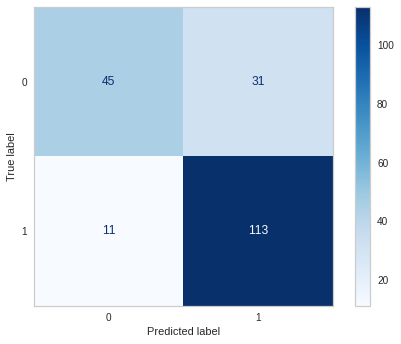

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        76
           1       0.82      0.87      0.84       124

    accuracy                           0.80       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.80      0.80      0.80       200



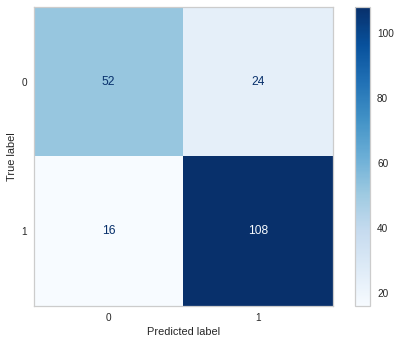

In [12]:
rng = np.random.default_rng(0)  # setting a default BitGenerator and seed  
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle the dataset

# Working_data = df.copy() #making copies of the dataset to work on. 
# display(Working_data) 

oneHotEncoder = OneHotEncoder() #initializing the OneHot Encoder
lblEncoder_X = LabelEncoder()   #initializing the Label Encoder 

#implementing label encoding  
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) #implementing label encoding for the column 'Sex' using the fit_transform method.
#implementing one hot encoding
onehot_enc = oneHotEncoder.fit(df[['Region','Education','WorkType']]) #implementing OneHotEncoder for columns Region,Education and WorkType

OHT = onehot_enc.transform(df[['Region','Education','WorkType']]).toarray() #transformming the columns using the onehot_enc.transform method
Region_encoded=onehot_enc.categories_[0] #creating an array for the region
Education_encoded = onehot_enc.categories_[1] #creating an array for the education
WorkType_encoded = onehot_enc.categories_[2] #creating an array for the worktype

Con_encoded= np.concatenate((Region_encoded,Education_encoded,WorkType_encoded)) #creating a nd array by combining all the array
OHT_df = pd.DataFrame(OHT,columns=Con_encoded) #converting the nd array to a dataframe
df_tr = df.join(OHT_df) #merging the one-hot encoded columns back with original DataFrame.

#dropping the columns that were 
df_tr=df_tr.drop(columns='WorkType')
df_tr=df_tr.drop(columns='Region')
df_tr=df_tr.drop(columns='Education')
  
print('data frame after pre-processing')
#diaplay the processed data frame
display(df_tr) 

#selecting our feature for our model
Features=['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression','Private sector', 'Public Sector', 'Unemployed', 'Self Employed',
         'Sex','East Midlands', 'East of England','London', 'North East', 'North West', 'Northern Ireland',
          'Scotland','South East', 'South West', 'Wales', 'West Midlands','Yorkshire and The Humber','A Level', 'Degree', 'GCSE', 'Masters','None', 'Other', 'PhD']

X = np.array(df_tr[Features]) #creating an nd array  of the features
#test = pd.DataFrame(data=X,columns=[Features]) #creating a dataframe


# df_tr['Salary'].loc[df_tr['Salary'] < 35000 ] = 0
# df_tr['Salary'].loc[df_tr['Salary'] >= 35000 ] = 1
#creating a columns on 1's and 0's 
df_tr['Salary'] = np.where(df_tr['Salary'] > 35000.00,1,0) 

display(df_tr['Salary'])
y = np.array(df_tr['Salary']) #convert the Tragetvariable dataframe to nd array and store in y

#test2 = pd.DataFrame(data=y,columns=['Salary'])
#display(test2)


# Split the data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=2)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=2)

degree = 2
poly = PolynomialFeatures(degree=degree) #initializing the PolynomialFeatures object 
scaler = StandardScaler() #initializing the StandardScaler object.

poly.fit(X_train_raw) #fitting the polynomialfeature object to the training data 
X_train_poly = poly.transform(X_train_raw) #transforming the training data using  poly.transform

scaler.fit(X_train_poly) #fitting the StandardScaler object to the training data.
X_train = scaler.transform(X_train_poly) #transform the training data using scaler.transform method.

X_valid_poly = poly.transform(X_valid_raw) #transform the validation data using  poly.transform method with degree from the range.
X_valid = scaler.transform(X_valid_poly)   #transform the validation data using scaler.transform method.

model = LogisticRegression(random_state=0, C=1.0,solver='liblinear',penalty ='l1')
model.fit(X_train, y_train)

#using validation data
y_pred_valid = model.predict(X_valid)
print(classification_report(y_valid, y_pred_valid))
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_valid))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

#using test data
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()



Part 4 - SVM (Support Vector Machine ) 

implementing grid search for svm


In [ ]:
#implementing grid search for SVM
from sklearn.model_selection import GridSearchCV
import sklearn.svm 
# Create support vector classifier object
rng = np.random.default_rng(0)  # Construct a new Generator with the default BitGenerator and seed  
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) #Randomize the data set.

lblEncoder_X = LabelEncoder()   #initialize the Label Encoder 
oneHotEncoder = OneHotEncoder() #initialize the OneHot Encoder

#performing label Encoding and One hot encoding 

df['Sex'] = lblEncoder_X.fit_transform(df['Sex'])  #Label Encoding our categorical variable (columns - 'Sex') using the fit_transform method.
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) #Label Encoding our categorical variable (columns - 'WorkType') using the fit_transform method.
df['Region'] = lblEncoder_X.fit_transform(df['Region'])
df['Education'] = lblEncoder_X.fit_transform(df['Education'])

Sal_data_df = df


#Select feature names for fitiing the model.
Features=['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression','WorkType',
         'Sex','Region','Education']
X = np.array(Sal_data_df[Features]) #convert the feature dataframe into nd array and store in X
Sal_data_df['Salary'].loc[Sal_data_df['Salary'] < 35000 ] = 0
Sal_data_df['Salary'].loc[Sal_data_df['Salary'] >= 35000 ] = 1
display(Sal_data_df['Salary'])
y = np.array(Sal_data_df['Salary'])

X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=2)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=2)

degree = 2
poly = PolynomialFeatures(degree=degree) #initializing the PolynomialFeatures object 
scaler = StandardScaler() #initializing the StandardScaler object.

poly.fit(X_train_raw) #fitting the polynomialfeature object to the training data 
X_train_poly = poly.transform(X_train_raw) #transforming the training data using  poly.transform

scaler.fit(X_train_poly) #fitting the StandardScaler object to the training data.
X_train = scaler.transform(X_train_poly)

X_valid_poly = poly.transform(X_valid_raw) #transform the validation data using  poly.transform method with degree from the range.
X_valid = scaler.transform(X_valid_poly) 
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(sklearn.svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

y_pred = grid.predict(X_valid)

implementing svm based on the values got for the hyper parameters from the above grid search

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: Salary, Length: 1000, dtype: float64

              precision    recall  f1-score   support

         0.0       0.84      0.67      0.74        76
         1.0       0.82      0.92      0.87       124

    accuracy                           0.82       200
   macro avg       0.83      0.80      0.81       200
weighted avg       0.83      0.82      0.82       200



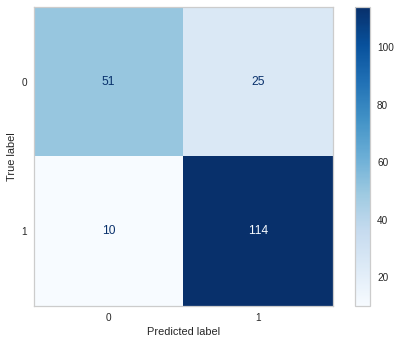

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82        76
         1.0       0.88      0.92      0.90       124

    accuracy                           0.87       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.87      0.87       200



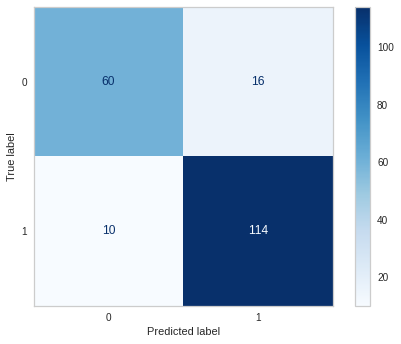

In [18]:
import sklearn.svm 
# Create support vector classifier object
rng = np.random.default_rng(0)  # Construct a new Generator with the default BitGenerator and seed  
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) #Randomize the data set.

lblEncoder_X = LabelEncoder()   #initialize the Label Encoder 
oneHotEncoder = OneHotEncoder() #initialize the OneHot Encoder

#performing label Encoding and One hot encoding 

df['Sex'] = lblEncoder_X.fit_transform(df['Sex'])  #Label Encoding our categorical variable (columns - 'Sex') using the fit_transform method.
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) #Label Encoding our categorical variable (columns - 'WorkType') using the fit_transform method.
df['Region'] = lblEncoder_X.fit_transform(df['Region'])
df['Education'] = lblEncoder_X.fit_transform(df['Education'])

Sal_data_df = df


#Select feature names for fitiing the model.
Features=['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression','WorkType',
         'Sex','Region','Education']
X = np.array(Sal_data_df[Features]) #convert the feature dataframe into nd array and store in X
Sal_data_df['Salary'].loc[Sal_data_df['Salary'] < 35000 ] = 0
Sal_data_df['Salary'].loc[Sal_data_df['Salary'] >= 35000 ] = 1
display(Sal_data_df['Salary'])
y = np.array(Sal_data_df['Salary'])##convert the Tragetvariable dataframe to nd array and store in y


# Split the data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=2)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=2)

degree = 2
poly = PolynomialFeatures(degree=degree) #initializing the PolynomialFeatures object 
scaler = StandardScaler() #initializing the StandardScaler object.

poly.fit(X_train_raw) #fitting the polynomialfeature object to the training data 
X_train_poly = poly.transform(X_train_raw) #transforming the training data using  poly.transform

scaler.fit(X_train_poly) #fitting the StandardScaler object to the training data.
X_train = scaler.transform(X_train_poly) #transform the training data using scaler.transform method.

X_valid_poly = poly.transform(X_valid_raw) #transform the validation data using  poly.transform method with degree from the range.
X_valid = scaler.transform(X_valid_poly)   #transform the validation data using scaler.transform method.

model = sklearn.svm.SVC(C=1000,gamma=0.001,kernel='rbf',random_state=40)
#model = sklearn.svm.SVC(C=50,gamma='scale',kernel='poly')
model.fit(X_train, y_train)

#using validation data
y_pred_valid = model.predict(X_valid)
print(classification_report(y_valid, y_pred_valid))
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_valid))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

#using test data
X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# obj = sklearn.svm.SVC(C=1000,gamma=0.01,kernel='rbf',random_state=40)

# # Train the model using the training sets
# obj.fit(X_train, y_train)

# # Make predictions using the testing set
# y_pred = obj.predict(X_new)




**PART-5 Neural Networks**


,Age,SiteSpending,SiteTime,RecommendImpression,Education,Sex,WorkType,Region,GreaterThan35K
0,43,1877.77,50.30,2,1,0,0,6,1
1,38,265.03,71.00,0,1,1,0,7,1
2,24,624.06,87.70,3,4,0,0,6,0
3,34,3185.07,194.51,7,6,0,0,11,1
4,52,141.47,290.55,5,2,1,0,6,0
...,...,...,...,...,...,...,...,...,...
995,59,124.65,163.45,9,2,1,3,5,1
996,37,1061.61,97.25,3,4,0,0,1,1
997,38,1859.63,160.02,0,2,0,2,7,1
998,50,40.43,271.73,9,0,0,0,10,1


The shape of `X_train`: (600, 8)
The shape of `X_valid`: (200, 8)
The shape of `X_test`: (200, 8)
Model: "logistic_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 1s 31ms/step - loss: 0.7302 - binary_accuracy: 0.5900 - val_loss: 0.6420 - val_binary_accuracy: 0.6950
Epoch 2/50
6/6 [==============================] - 0s 7ms/step 

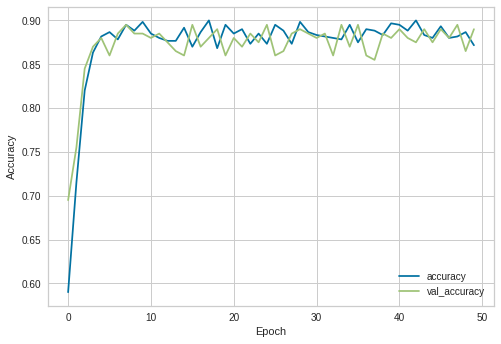

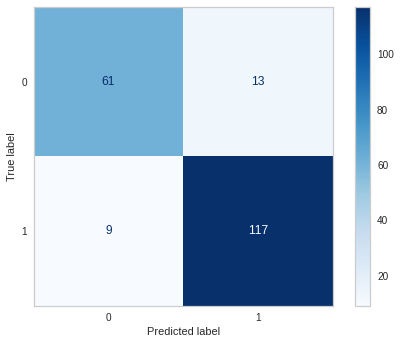

In [9]:
raw_df = pd.read_csv('Comp1801CourseworkData.csv')
# displaying the top 5 rows
raw_df.head()
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

df_copy = df.copy() # making a copy for the data frame
df_copy['GreaterThan35K'] = np.where(df['Salary'] > 35000.00,1,0)
#display(df_copy)
df_copy['GreaterThan35K'].value_counts()
tar='GreaterThan35K'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region','Salary'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_pd = pd.DataFrame(df_copy[col_fin])
#y_pd = pd.DataFrame(df_copy[tar])
Y_pd = df_copy[tar].to_frame()

# Display the dataset
XY_pd = pd.concat([X_pd, Y_pd], axis=1)
display(XY_pd)

# prepare NumPy ndarrays
X_raw = X_pd.to_numpy()
Y = Y_pd.to_numpy()

# Split the data into training/test data
# `shuffle=True` for non-time series case. You should set `shuffle=False` to avoid future data being contaminated in the training data.
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_raw, Y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.25, shuffle=True, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)

#checking the shape of our datasets
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

# Define the regularizer.
alpha = 0.01
kernel_regularizer = L2(l2=alpha)

# Define the `Dense` layer.
# The output dimension is 1, so we specify `units=1`.
# The as we are performing binary classification, we specify `activation=sigmoid`.
# We apply l2 regularization on the kernel parameters by specifying a `kernel_regularizer` argument.
dense_layer_1 = Dense(units=10, activation=relu, kernel_regularizer=kernel_regularizer)
output_layer = Dense(units=1, activation=sigmoid, kernel_regularizer=kernel_regularizer)

# Define the "virtual" input
input = Input(shape=X_train.shape[1:])

# Define the "virtual" output
output = dense_layer_1(input)
output = output_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='logistic_regression')

# Output the summary of the model.
model.summary()

#initalizing varaibles for evalution
adam = Adam(learning_rate=0.1)
ce = BinaryCrossentropy()
acc = BinaryAccuracy()
model.compile(optimizer=adam, loss=ce, metrics=[acc])

# Train the model.
# `epochs` determines the number of epochs.
# `batch_size` determines the batch_size.

history = model.fit(X_train, Y_train, batch_size=100, epochs=50, validation_data=(X_valid, Y_valid))


# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['binary_accuracy'], label='accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

ce_test, acc_test = model.evaluate(X_test, Y_test)
print('The cross entropy loss on the test data:', ce_test)
print('The accuracy on the test data:', acc_test)

#testing
Y_test_logit = model.predict(X_test)

Y_test_pred = (Y_test_logit > 0.5).astype(int)
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_test_pred),display_labels=['<35k', '>=35k'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, pos_label=1)
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Precision on validation data:', pre_test)
reca_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Recall on validation data:', reca_test)


Checking for class imbalance

,Age,SiteSpending,SiteTime,RecommendImpression,Education,Sex,WorkType,Region,GreaterThan35K
0,43,1877.77,50.30,2,1,0,0,6,1
1,38,265.03,71.00,0,1,1,0,7,1
2,24,624.06,87.70,3,4,0,0,6,0
3,34,3185.07,194.51,7,6,0,0,11,1
4,52,141.47,290.55,5,2,1,0,6,0
...,...,...,...,...,...,...,...,...,...
995,59,124.65,163.45,9,2,1,3,5,1
996,37,1061.61,97.25,3,4,0,0,1,1
997,38,1859.63,160.02,0,2,0,2,7,1
998,50,40.43,271.73,9,0,0,0,10,1


Model: "logistic_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 1s 33ms/step - loss: 0.7237 - binary_accuracy: 0.5767 - val_loss: 0.6373 - val_binary_accuracy: 0.6800
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.6247 - binary_accuracy: 0.6550 - val_loss: 0.5891 - val_binary_accuracy: 0.7450
Epoch 3/

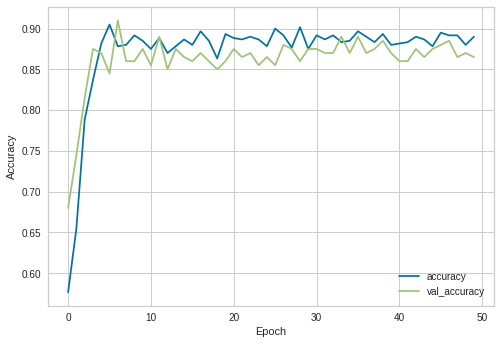

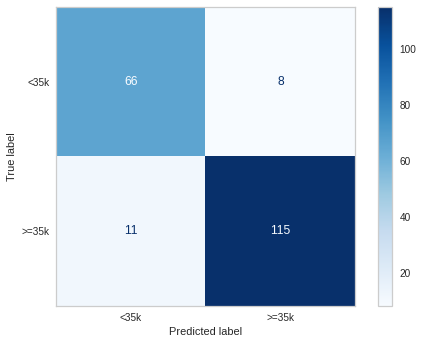

In [6]:
raw_df = pd.read_csv('Comp1801CourseworkData.csv')
# displaying the top 5 rows
raw_df.head()
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

lblEncoder_X = LabelEncoder()   
df['Region'] = lblEncoder_X.fit_transform(df['Region']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df['WorkType'] = lblEncoder_X.fit_transform(df['WorkType']) 
df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 

df_copy = df.copy() # making a copy for the data frame
df_copy['GreaterThan35K'] = np.where(df['Salary'] > 35000.00,1,0)
#display(df_copy)
df_copy['GreaterThan35K'].value_counts()
tar='GreaterThan35K'
#'Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region','Salary'
col_fin=['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','WorkType','Region']

X_pd = pd.DataFrame(df_copy[col_fin])
#y_pd = pd.DataFrame(df_copy[tar])
Y_pd = df_copy[tar].to_frame()

# Display the dataset
XY_pd = pd.concat([X_pd, Y_pd], axis=1)
display(XY_pd)

# prepare NumPy ndarrays
X_raw = X_pd.to_numpy()
Y = Y_pd.to_numpy()

# Split the data into training/test data
# `shuffle=True` for non-time series case. You should set `shuffle=False` to avoid future data being contaminated in the training data.
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_raw, Y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.25, shuffle=True, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)

# Define the regularizer.
alpha = 0.01
kernel_regularizer = L2(l2=alpha)

# Define the `Dense` layer.
# The output dimension is 1, so we specify `units=1`.
# The as we are performing binary classification, we specify `activation=sigmoid`.
# We apply l2 regularization on the kernel parameters by specifying a `kernel_regularizer` argument.
dense_layer_1 = Dense(units=10, activation=relu, kernel_regularizer=kernel_regularizer)
output_layer = Dense(units=1, activation=sigmoid, kernel_regularizer=kernel_regularizer)

# Define the "virtual" input
input = Input(shape=X_train.shape[1:])

# Define the "virtual" output
output = dense_layer_1(input)
output = output_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='logistic_regression')

# Output the summary of the model.
model.summary()

adam = Adam(learning_rate=0.1)
ce = BinaryCrossentropy()
acc = BinaryAccuracy()
model.compile(optimizer=adam, loss=ce, metrics=[acc])

# Train the model.
# `epochs` determines the number of epochs.
# `batch_size` determines the batch_size.

m = {}
m[0] = np.sum((Y_train == 0).astype(int)) # Count how many times `0` appears in the target matrix.
m[1] = np.sum((Y_train == 1).astype(int)) # Count how many times `1` appears in the target matrix.
m_total = m[0] + m[1]
class_weight = {0: m_total / (2.0 * m[0]), 1: m_total / (2.0 * m[1])}

history = model.fit(X_train, Y_train, batch_size=100, epochs=50, validation_data=(X_valid, Y_valid), class_weight=class_weight)

# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['binary_accuracy'], label='accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Y_test_logit = model.predict(X_test)
Y_test_pred = (Y_test_logit > 0.5).astype(int)
bacc = balanced_accuracy_score(Y_test, Y_test_pred)
print('The balanced accuracy score on the test data:', bacc)

disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_test_pred),display_labels=['<35k', '>=35k'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, pos_label=1)
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Precision on test data:', pre_test)
reca_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Recall on test data:', reca_test)

Part-6 Kmeans clustering


Computing the idea cluster number k


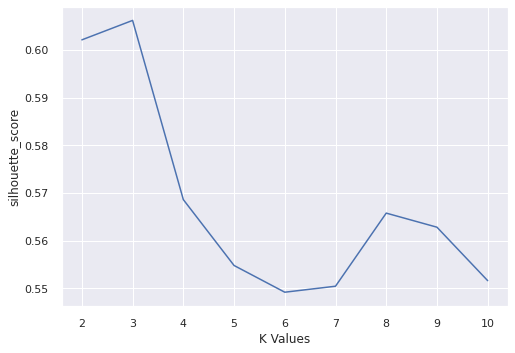

In [18]:
import sklearn.svm 
import matplotlib.pyplot as plt # A library to draw a scatter plot 
import seaborn as sns 
from sklearn.cluster import KMeans

customerData = pd.read_csv('Comp1801CourseworkData.csv')
raw_df = pd.DataFrame(data = customerData)

rng = np.random.default_rng(0)  # Construct a new Generator with the default BitGenerator and seed  
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) #Randomize the data set.



col = ['Age','Salary']
X = np.array(df[col])

# visualizer = KElbowVisualizer(model,k = (2,10), metric = 'silhouette')#, metric = 'silhouette'
# visualizer.fit(X)
# visualizer.show()
# plt.show()
sil = []
kvalues = [2,3,4,5,6,7,8,9,10]

for k in kvalues:
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(kvalues,sil)
plt.xlabel("K Values")
plt.ylabel("silhouette_score")
plt.show()


Text(0.5, 1.0, 'Clustering results')

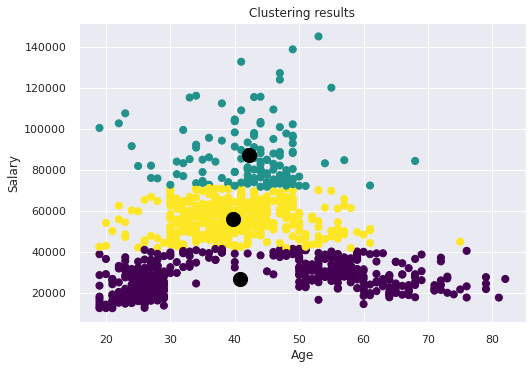

In [19]:
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(X)
sns.set() # For a more sophisticated plot style.



plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200);
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Clustering results')